In [94]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df=pd.read_csv(r"C:\Users\ramiu\Desktop\N N\Question2_Bengaluru_House_Price_Prediction\Bengaluru_House_Data.csv")

In [96]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [97]:
df.shape

(13320, 9)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [99]:
df.isnull().sum() 

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# Performing EDA

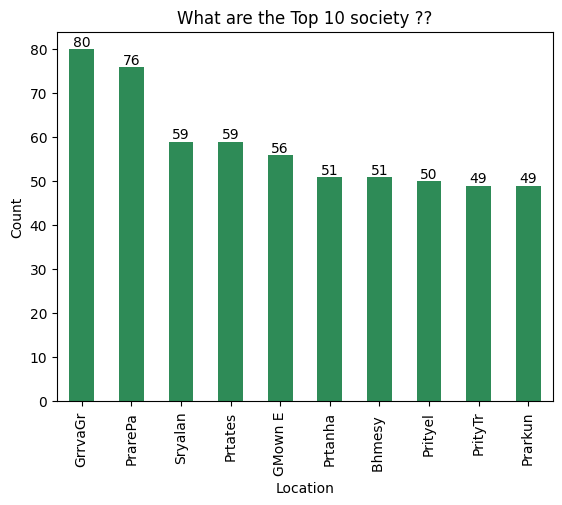

In [100]:
s = df['society'].value_counts().nlargest(10).plot(kind='bar', color='seagreen')

for p in s.patches:
    s.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('What are the Top 10 society ??')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

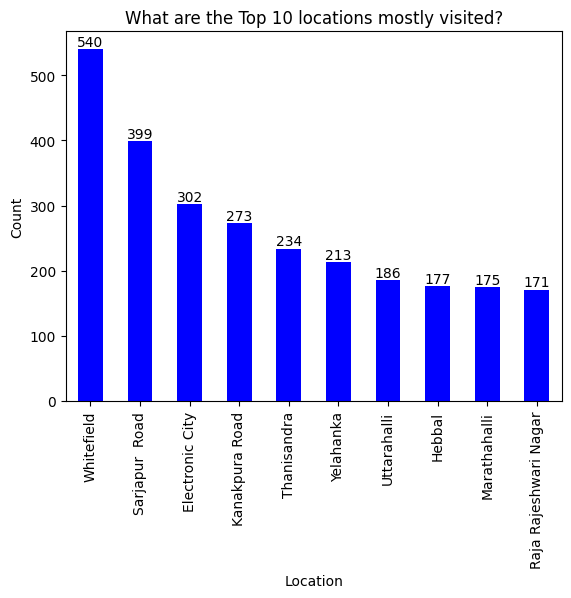

In [101]:
la = df['location'].value_counts().nlargest(10).plot(kind='bar', color='blue') 

for p in la.patches:
    la.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('What are the Top 10 locations mostly visited?')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

In [102]:
# Fill missing values in the 'size' column with the mean
df['size'].fillna(value=df['size'].mode(), inplace=True)

# Fill missing values in the 'bath' column using forward fill method
df['bath'].fillna(method='ffill', inplace=True)
df['balcony'].fillna(method='ffill', inplace=True)
# Drop columns 'society' and 'availability'
df = df.drop(columns=['society', 'availability','location'])

# Convert 'total_sqft' to float64
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

C:\Users\ramiu\AppData\Local\Temp\ipykernel_25208\3098965052.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['size'].fillna(value=df['size'].mode(), inplace=True)
C:\Users\ramiu\AppData\Local\Temp\ipykernel_25208\3098965052.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13073 non-null  float64
 3   bath        13320 non-null  float64
 4   balcony     13320 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(4), object(2)
memory usage: 624.5+ KB


In [104]:
df.isnull().sum()

area_type       0
size           16
total_sqft    247
bath            0
balcony         0
price           0
dtype: int64

In [105]:
df.dropna(inplace=True)

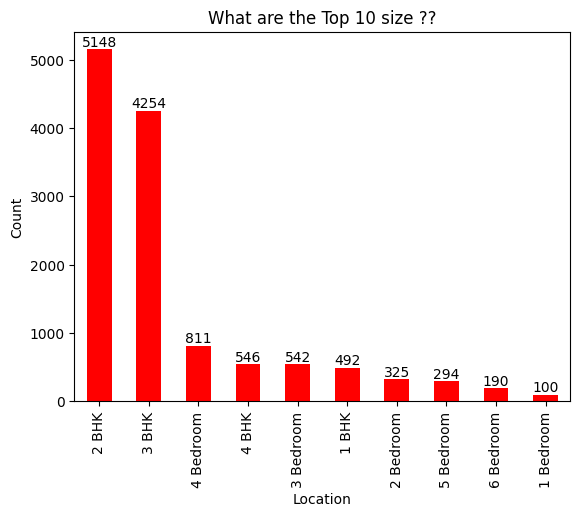

In [106]:
l = df['size'].value_counts().nlargest(10).plot(kind='bar', color='red') 

for p in l.patches:
    l.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('What are the Top 10 size ??')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

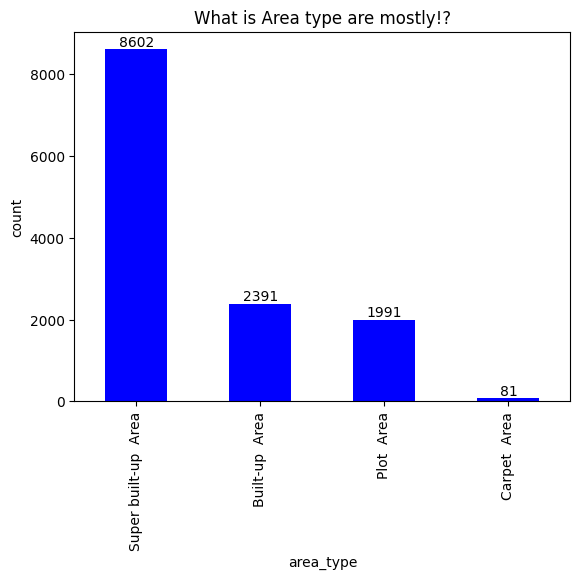

In [107]:
at=df['area_type'].value_counts().plot(kind='bar',color='blue')
for p in at.patches:
    at.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('What is Area type are mostly!?')
plt.xlabel('area_type')
plt.ylabel('count')
plt.show()

In [108]:
df.head()

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,2 BHK,1200.0,2.0,1.0,51.00


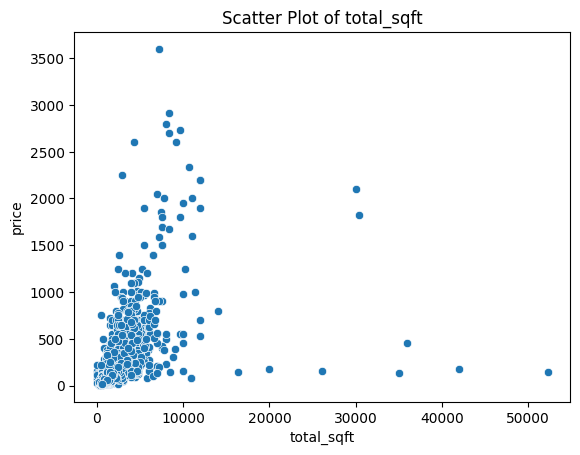

In [109]:
sns.scatterplot(x='total_sqft', y='price', data=df)  
plt.title('Scatter Plot of total_sqft')
plt.xlabel('total_sqft')
plt.ylabel('price')  
plt.show()

In [110]:
df.loc[df['total_sqft'] >= 10000, 'total_sqft'] = np.nan

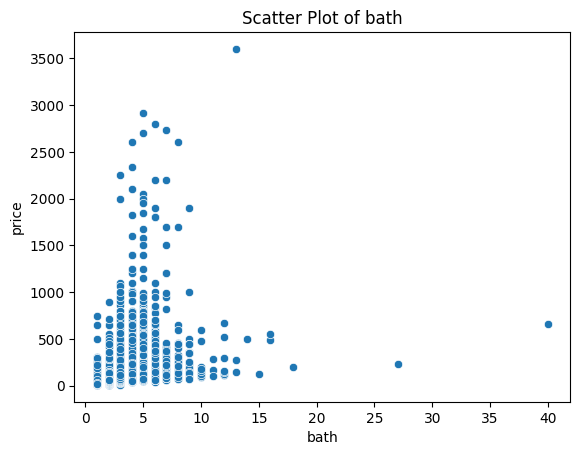

In [111]:
sns.scatterplot(x='bath', y='price', data=df)  
plt.title('Scatter Plot of bath')
plt.xlabel('bath')
plt.ylabel('price')  
plt.show()

In [112]:
df.loc[df['bath'] >= 17.5, 'bath'] = np.nan

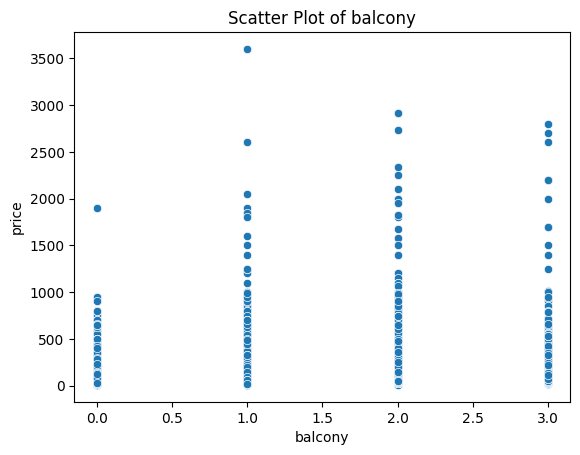

In [113]:
sns.scatterplot(x='balcony', y='price', data=df)  
plt.title('Scatter Plot of balcony')
plt.xlabel('balcony')
plt.ylabel('price')  
plt.show()

In [114]:
df.drop(columns='area_type', inplace=True)

In [115]:
df.drop(columns='size', inplace=True)

In [116]:
df

,total_sqft,bath,balcony,price
0,1056.0,2.0,1.0,39.07
1,2600.0,5.0,3.0,120.00
2,1440.0,2.0,3.0,62.00
3,1521.0,3.0,1.0,95.00
4,1200.0,2.0,1.0,51.00
...,...,...,...,...
13315,3453.0,4.0,0.0,231.00
13316,3600.0,5.0,0.0,400.00
13317,1141.0,2.0,1.0,60.00
13318,4689.0,4.0,1.0,488.00


In [117]:
df.isnull().sum()

total_sqft    27
bath           3
balcony        0
price          0
dtype: int64

In [118]:
df.dropna(inplace=True)

# Normalization of data

In [119]:
df['sqft_price']=df['total_sqft']*df['price']

In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [121]:
df=df_scaled.copy()

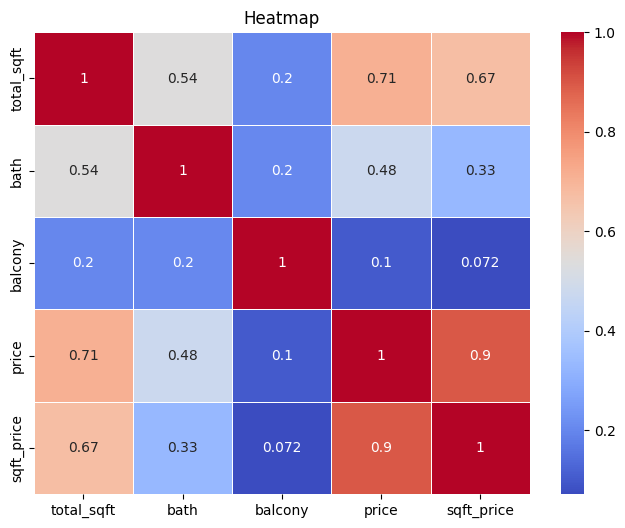

In [122]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap')
plt.show()

# Model Training Started

In [123]:
X = df.drop(['price'],axis='columns')
y = df.price

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [125]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [126]:
lr.fit(X_train,y_train)

LinearRegression()

In [127]:
lr.score(X_test,y_test)

0.8486179305911086

In [128]:
y_pred=lr.predict(X_test)

In [129]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
acc = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is: ",acc )
score=r2_score(y_pred,y_test)
print("R-squared (coefficient of determination) score is : {:.2f}%".format(score * 100))
score=lr.score(X_train,y_train)
print("Accuracy for Training: {:.2f}%".format(score * 100))
score=lr.score(X_test,y_test)
print("Accuracy for Testing: {:.2f}%".format(score * 100))

Mean Absolute Error is:  0.007943485946466782
R-squared (coefficient of determination) score is : 81.17%
Accuracy for Training: 84.75%
Accuracy for Testing: 84.86%


In [130]:
result_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
result_df

,Actual,Predicted
0,0.010301,0.014652
1,0.042873,0.036011
2,0.030624,0.028602
3,0.021896,0.019479
4,0.036192,0.038548
...,...,...
2602,0.049276,0.035508
2603,0.007238,0.014829
2604,0.013641,0.015241
2605,0.022829,0.019447
